# Capstone project task 1

## Abstract
In order to finish this task, I used python and jupyter notebook to develop and run my code.<br />
I used graphlab to run text alalytic algorithms and matplot to visualize.

## Implementation

At first I imported all dataset. Because of the task requirement, I think that only the text reviews themselves are important, so I remove columns like: 'votes', 'data' and id columns.

In [1]:
import graphlab as gl
import matplotlib.pyplot as plt 
import stop_words as sw
from wordcloud import WordCloud
topic_size = 10
reviews = gl.SFrame.read_json('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json',orient='lines')
reviews.remove_columns(['business_id','date','review_id','user_id','votes','type'])
stopwords = gl.text_analytics.stopwords() | set(sw.safe_get_stop_words('en'))
delimiters=["\r", "\v", "\n", "\f", "\t", " ",'-','.',',','?','&','!',':',';','"','(',')','[',']','{','}','=','/']

This non-commercial license of GraphLab Create for academic use is assigned to thienvamai@gmail.com and will expire on July 09, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\thienbui\AppData\Local\Temp\graphlab_server_1479820711.log.0


Finished parsing file C:\Users\thienbui\Documents\Data\yelp_dataset\yelp_dataset_challenge_academic_dataset\yelp_academic_dataset_review.json

Parsing completed. Parsed 100 lines in 0.276184 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[dict]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 59353 lines. Lines per second: 95476.1

Read 899567 lines. Lines per second: 157785

Finished parsing file C:\Users\thienbui\Documents\Data\yelp_dataset\yelp_dataset_challenge_academic_dataset\yelp_academic_dataset_review.json

Parsing completed. Parsed 1125458 lines in 7.05734 secs.

After that, I created a dictionary map each word appeared in the review with its tf_idf score. I also removed stop words from the dictionary as they are mostly invaluable.

In [2]:
reviews['word_count'] = gl.text_analytics.count_words(reviews['text'],delimiters = delimiters).dict_trim_by_keys(stopwords, exclude=True)
reviews['tf_idf'] = gl.text_analytics.tf_idf(reviews['word_count']) 

Because the data is quite big, I only use 10% of all reviews (about 110,000 reviews) to analyse.
The data after preprocessing look like this:

In [3]:
sample = reviews.sample(.1,seed = 317)
sample.head()

Columns:
	stars	int
	text	str
	word_count	dict
	tf_idf	dict

Rows: 10

Data:
+-------+-------------------------------+-------------------------------+
| stars |              text             |           word_count          |
+-------+-------------------------------+-------------------------------+
|   5   | Dr. Eric Goldberg is a fan... | {'accessible': 1L, 'fantas... |
|   3   | Ate a Saturday morning bre... | {'saturday': 1L, 'madison'... |
|   5   | i rarely give five star re... | {'breakfasts': 1L, 'give':... |
|   3   | This is definitely not you... | {'good': 1L, 'rude': 1L, '... |
|   4   | Unlimited hot coffee. I do... | {'generous': 1L, 'good': 1... |
|   5   | Californians are all about... | {'love': 1L, 'family': 1L,... |
|   4   | My meaty goodness...why is... | {'cheese': 1L, 'picnic': 1... |
|   5   | Love it!!!!! Love it!!!!!!... |  {'love': 4L, "culver's": 1L} |
|   3   | If you live in Madison, yo... | {'charter': 1L, 'love': 1L... |
|   2   | My arch-enemy.\n\nI've nev... | {'contacted': 1L, 'extra':... |
+-------+-------------------------------+-------------------------------+
+-------------------------------+
|             tf_idf            |
+-------------------------------+
| {'accessible': 6.440940320... |
| {'saturday': 3.71624209807... |
| {'breakfasts': 6.554692494... |
| {'good': 0.940048273746272... |
| {'generous': 4.52311691848... |
| {'love': 1.891023760765290... |
| {'cheese': 2.5850249953356... |
| {'love': 7.564095043061161... |
| {'charter': 9.467792503229... |
| {'contacted': 6.2379426313... |
+-------------------------------+
[10 rows x 4 columns]

### Task 1.1:
In this task, I will use 2 different methods of lda topic modeling named Collapsed Gibbs sampling (cgs) and AliasLDA method (alias) to create 10 topics each model. After that, I will creat visualization base on 2 model topics and compare them.

In [4]:
def model_cgs(data):
    return gl.topic_model.create(data,num_topics=topic_size, num_iterations=200,print_interval=50,method='cgs')
def model_alias(data):
    return gl.topic_model.create(data, num_topics=topic_size, num_iterations=50,print_interval=50,method='alias')

In [5]:
topic_model_cgs = model_cgs(sample['tf_idf'])

Learning a topic model

Number of documents    112471

Vocabulary size    100116

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 50        | 14.73s        | 1.70556e+007   | 0               |

| 100       | 29.30s        | 1.63723e+007   | 0               |

| 150       | 44.44s        | 1.59693e+007   | 0               |

| 200       | 1m 0s         | 1.51056e+007   | 0               |

+-----------+---------------+----------------+-----------------+

In [6]:
topic_model_alias = model_alias(sample['tf_idf'])

Learning a topic model

Number of documents    112471

Vocabulary size    100116

Initializing topic assignments

Constructed alias samplers:1.96323s

Using 1 blocks.

+-----------+---------------+----------------+-----------------+-------------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity | Elapsed for perp. |

+-----------+---------------+----------------+-----------------+-------------------+

| 50        | 4m 47s        | 4.58216e+006   | 0               | 0                 |

+-----------+---------------+----------------+-----------------+-------------------+

In [7]:
def plot_word_cloud(ls):
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(ls)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [8]:
def print_model(model):
    words = model.get_topics(num_words=100).pack_columns(columns=['word','score'],new_column_name='value')
    for i in range(topic_size):
        print 'Topic %d:'%i
        dt= words.filter_by(i,'topic')
        plot_word_cloud(dt['value'])

#### Sample data using alias method:

Topic 0:


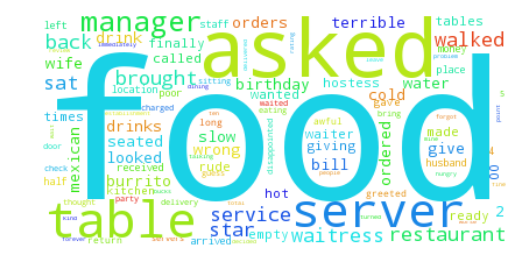

Topic 1:


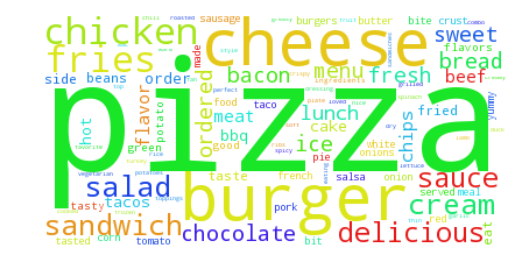

Topic 2:


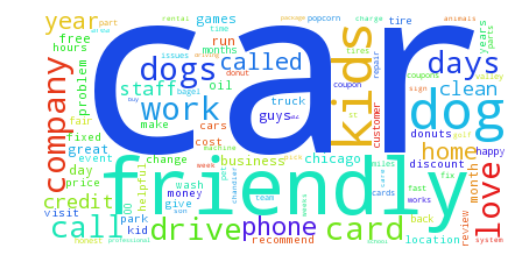

Topic 3:


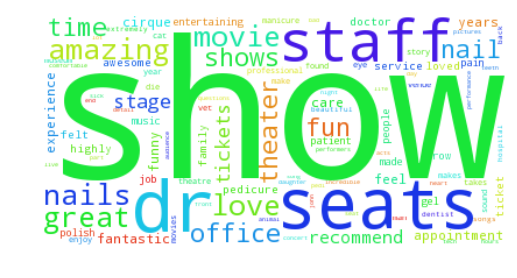

Topic 4:


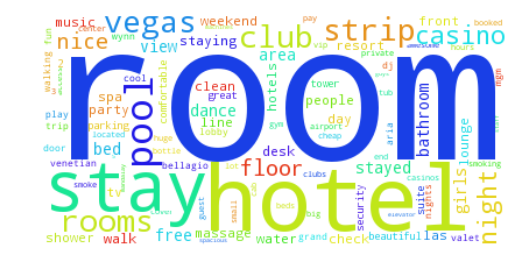

Topic 5:


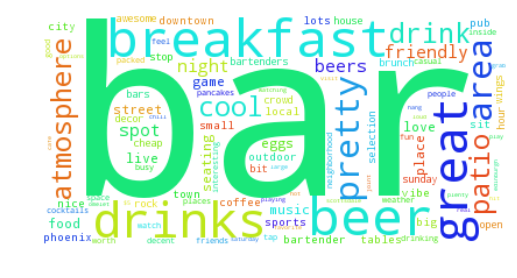

Topic 6:


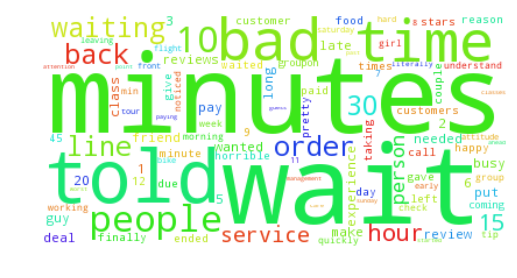

Topic 7:


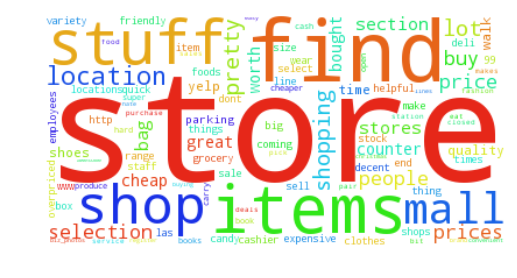

Topic 8:


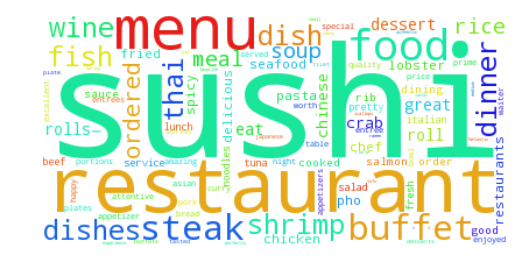

Topic 9:


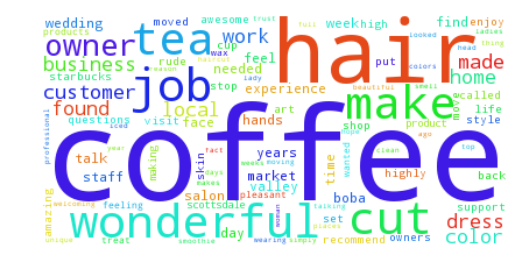

In [9]:
print_model(topic_model_alias)

#### Sample data using cgs method:

Topic 0:


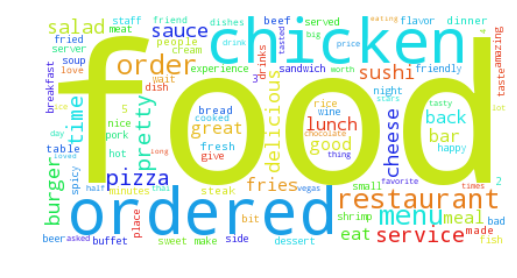

Topic 1:


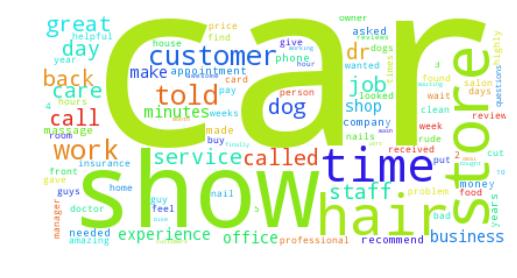

Topic 2:


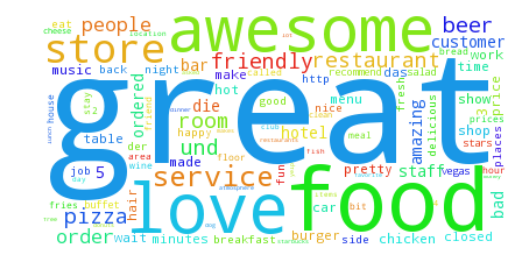

Topic 3:


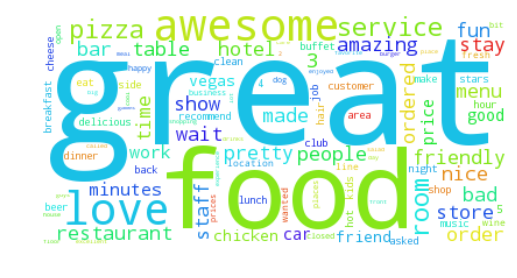

Topic 4:


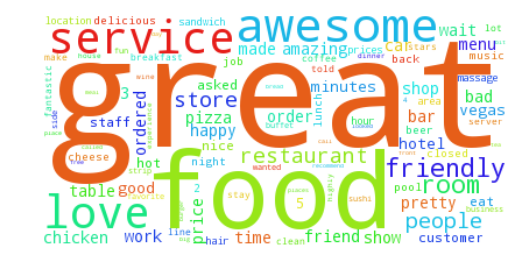

Topic 5:


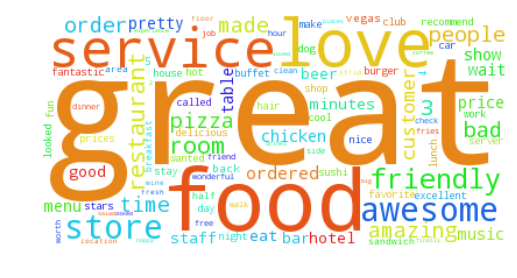

Topic 6:


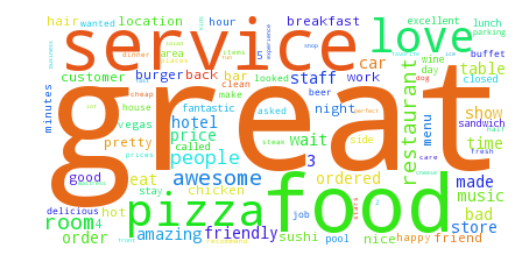

Topic 7:


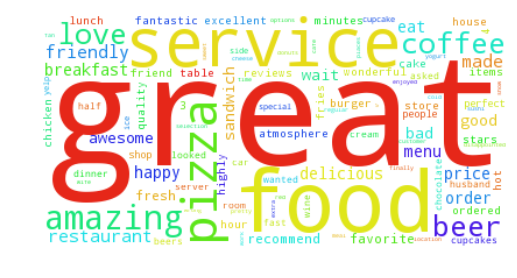

Topic 8:


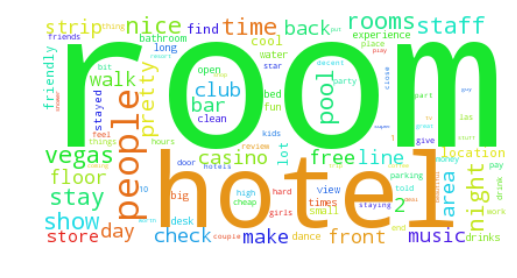

Topic 9:


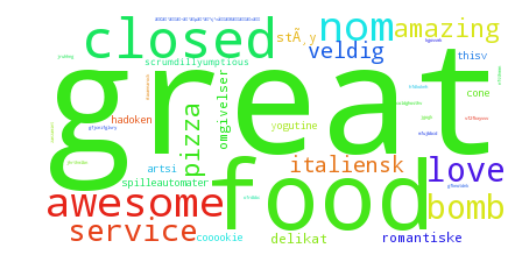

In [10]:
print_model(topic_model_cgs)

It is clear that alias method did better job than cgs method.<br />
Model using alias method can differentiate topics very good and topics look very distinct: restaurants, coffee shops, stores, movie theatres, ... <br />
By contrast, cgs method did not do well its job because more than half the topics scored the word *'great'* as the most important words. Therefore, in task 1.2 I will only use alias method.

### Task 1.2:
In this task, I will get about 100,000 positive reviews (5 stars) and about 100,000 negative reviews (1 or 2 stars) as sample and run topic models on them.

In [11]:
gl.canvas.set_target('ipynb')
reviews['stars'].show('Categorical')

It is clear that reviews with 4 or 5 stars account for 66% of original data and reviews with 3 or less stars share the remaining 33%. I will use 25% of positive reviews (5 stars) and 30% of negative reviews(less than 3 stars) as sample and run topic model on these samples. 

In [26]:
positive_reviews = reviews[reviews['stars'] == 5]
sample_positive = positive_reviews.sample(.25 ,seed = 317)
sample_positive.shape

(101630, 4)

In [27]:
negative_reviews = reviews[reviews['stars'] < 3]
sample_negative = negative_reviews.sample(.5,seed = 317)
sample_negative.shape

(106853, 4)

In [28]:
positive_model_alias = model_alias(sample_positive['tf_idf'])

Learning a topic model

Number of documents    101630

Vocabulary size     90040

Initializing topic assignments

Constructed alias samplers:5.91388s

Using 1 blocks.

+-----------+---------------+----------------+-----------------+-------------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity | Elapsed for perp. |

+-----------+---------------+----------------+-----------------+-------------------+

| 50        | 5m 34s        | 1.99086e+006   | 0               | 0                 |

+-----------+---------------+----------------+-----------------+-------------------+

In [29]:
negative_model_alias = model_alias(sample_negative['tf_idf'])

Learning a topic model

Number of documents    106853

Vocabulary size     96199

Initializing topic assignments

Constructed alias samplers:4.82136s

Using 1 blocks.

+-----------+---------------+----------------+-----------------+-------------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity | Elapsed for perp. |

+-----------+---------------+----------------+-----------------+-------------------+

| 50        | 9m 20s        | 2.55061e+006   | 0               | 0                 |

+-----------+---------------+----------------+-----------------+-------------------+

In [30]:
positive_model_cgs = model_cgs(sample_positive['tf_idf'])

Learning a topic model

Number of documents    101630

Vocabulary size     90040

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 50        | 29.25s        | 5.12551e+006   | 0               |

| 100       | 59.30s        | 6.58344e+006   | 0               |

| 150       | 1m 29s        | 3.63505e+006   | 0               |

| 200       | 1m 56s        | 3.70256e+006   | 0               |

+-----------+---------------+----------------+-----------------+

In [31]:
negative_model_cgs = model_cgs(sample_negative['tf_idf'])

Learning a topic model

Number of documents    106853

Vocabulary size     96199

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 50        | 31.08s        | 1.74431e+007   | 0               |

| 100       | 1m 6s         | 3.8975e+006    | 0               |

| 150       | 1m 40s        | 1.60621e+007   | 0               |

| 200       | 2m 16s        | 4.10311e+006   | 0               |

+-----------+---------------+----------------+-----------------+

Topic 0:


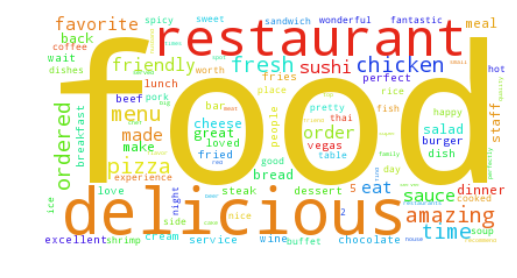

Topic 1:


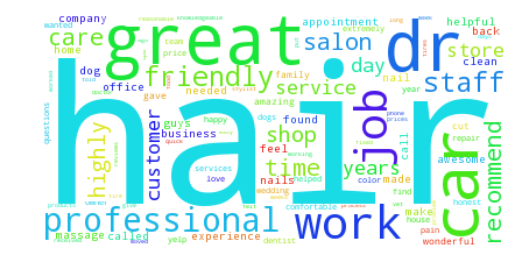

Topic 2:


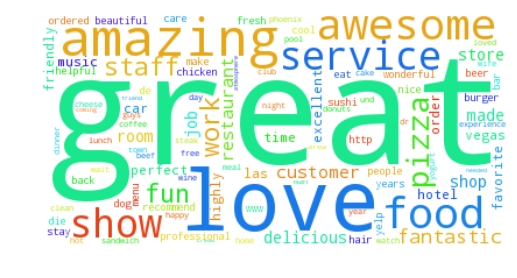

Topic 3:


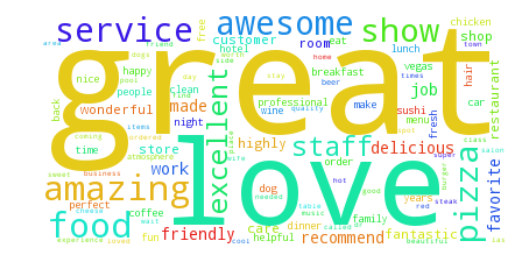

Topic 4:


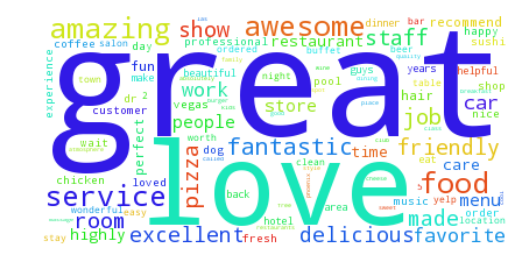

Topic 5:


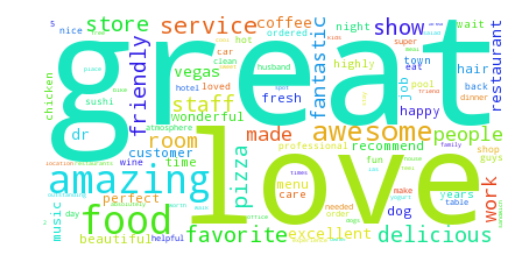

Topic 6:


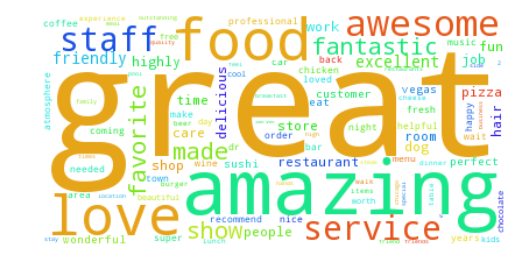

Topic 7:


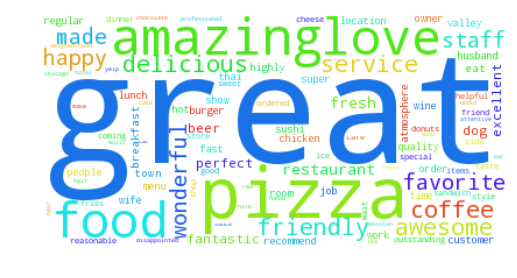

Topic 8:


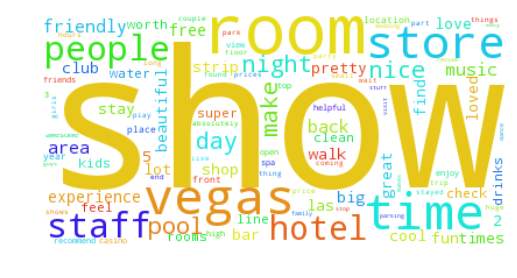

Topic 9:


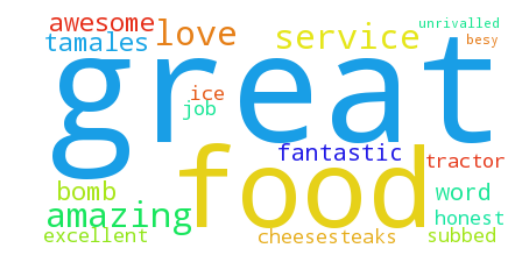

In [32]:
print_model(positive_model_cgs)

Topic 0:


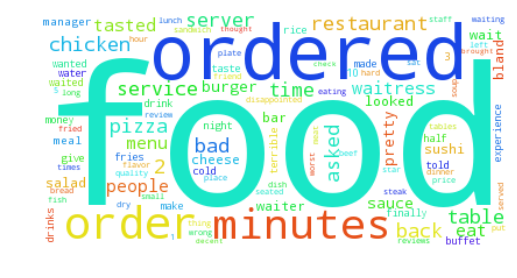

Topic 1:


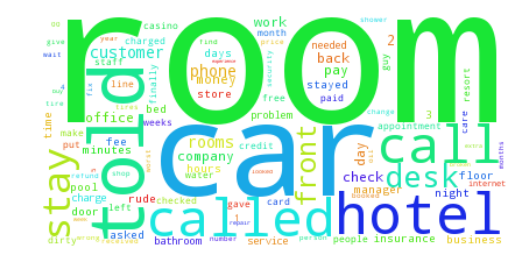

Topic 2:


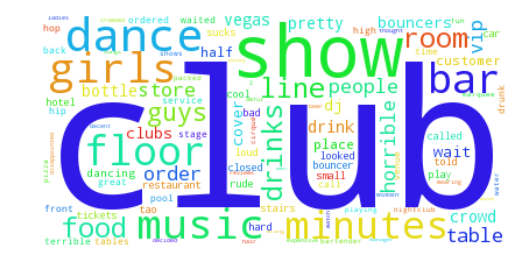

Topic 3:


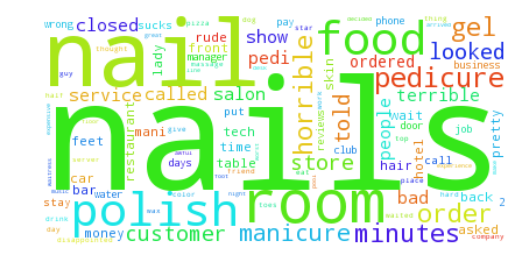

Topic 4:


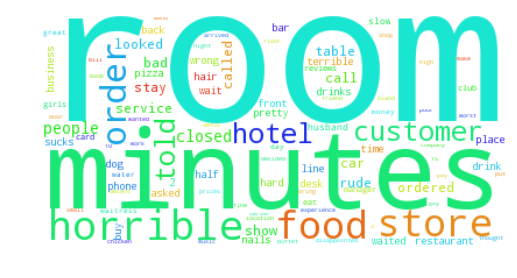

Topic 5:


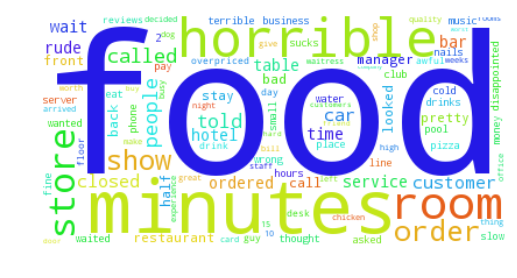

Topic 6:


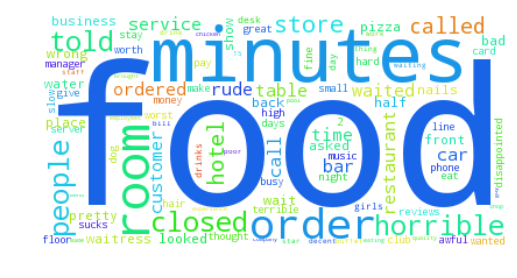

Topic 7:


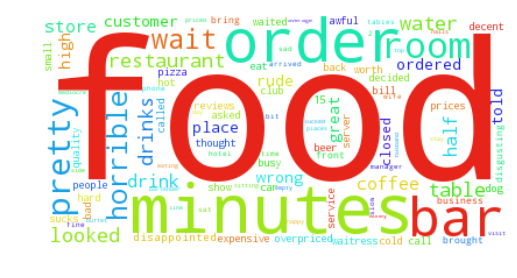

Topic 8:


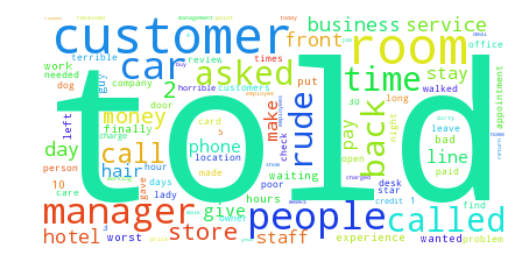

Topic 9:


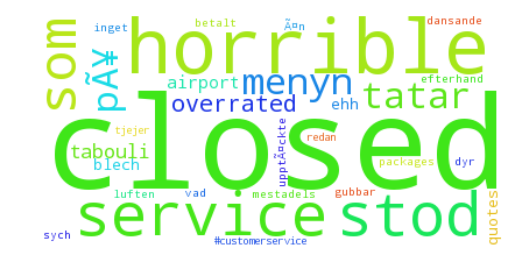

In [33]:
print_model(negative_model_cgs)

Topic 0:


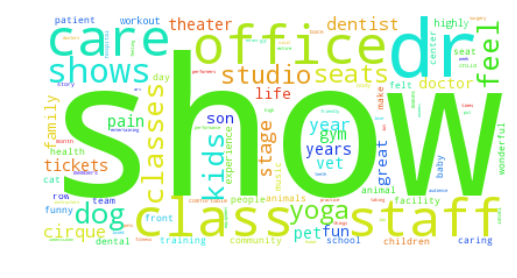

Topic 1:


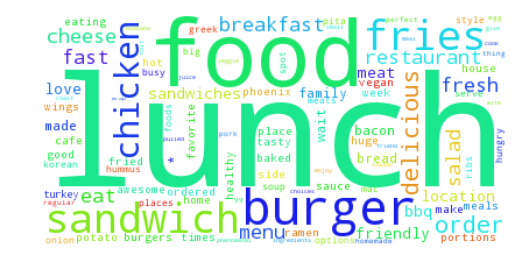

Topic 2:


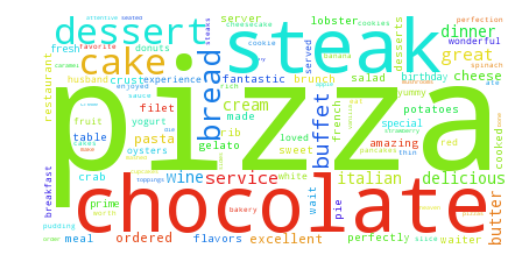

Topic 3:


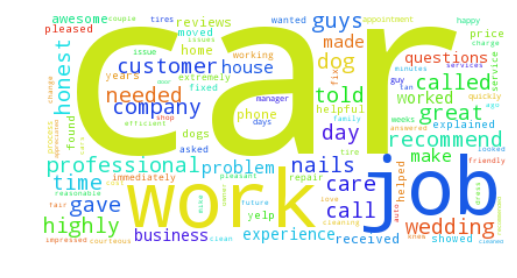

Topic 4:


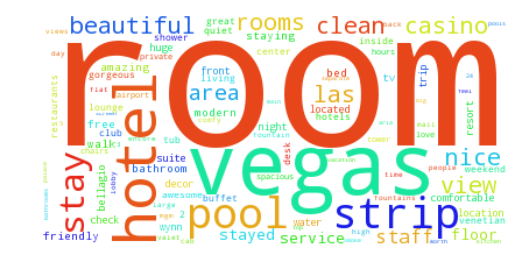

Topic 5:


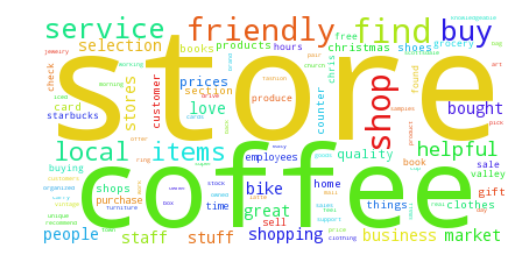

Topic 6:


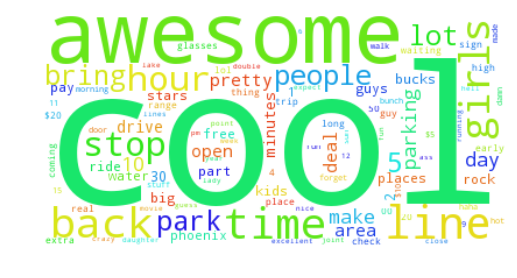

Topic 7:


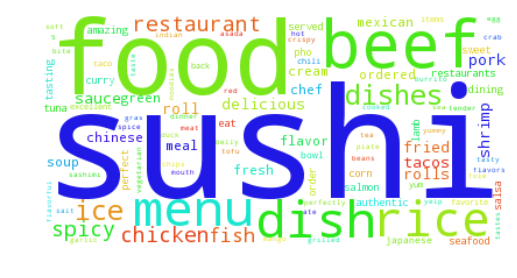

Topic 8:


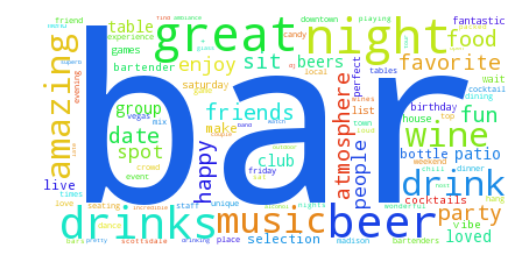

Topic 9:


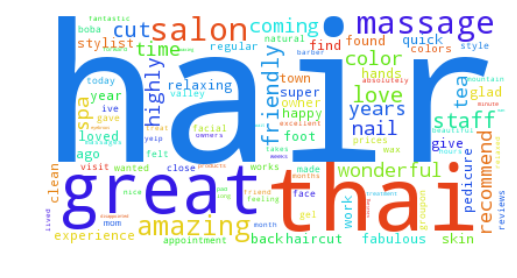

In [34]:
print_model(positive_model_alias)

Topic 0:


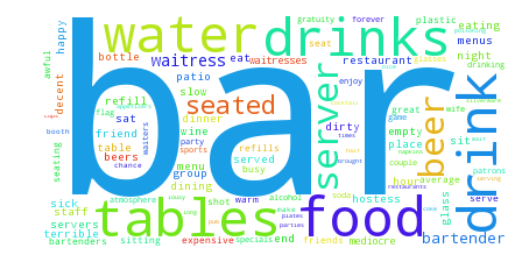

Topic 1:


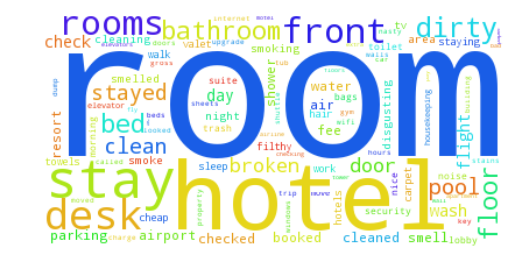

Topic 2:


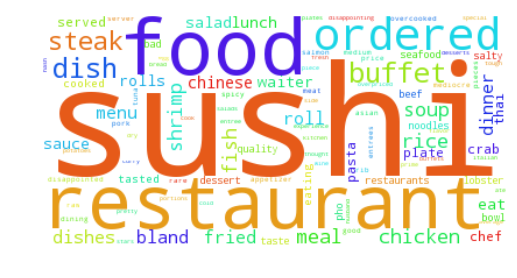

Topic 3:


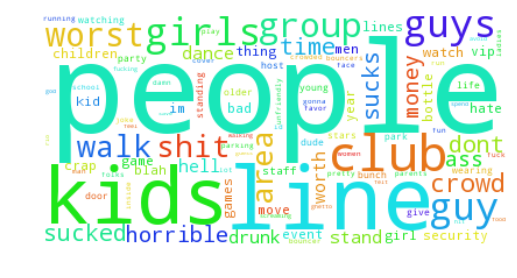

Topic 4:


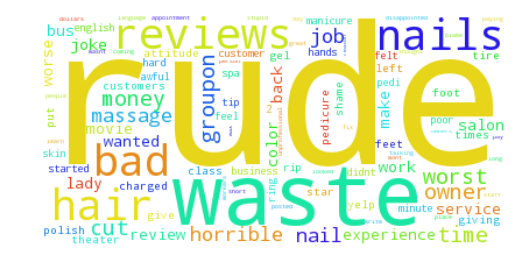

Topic 5:


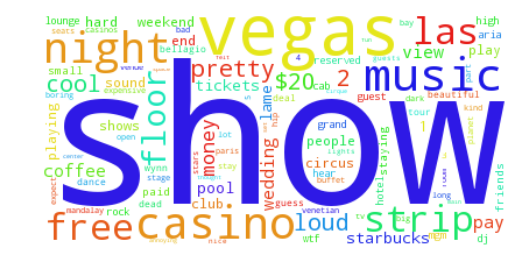

Topic 6:


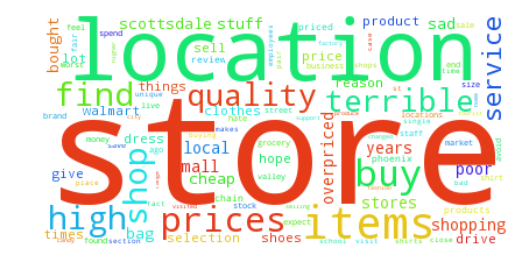

Topic 7:


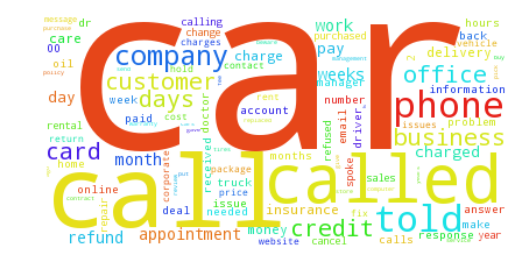

Topic 8:


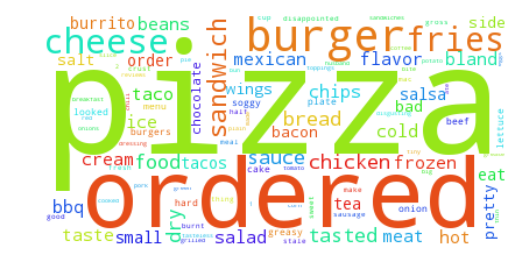

Topic 9:


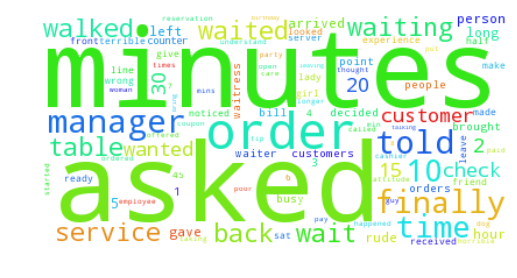

In [35]:
print_model(negative_model_alias)